In [1]:
#Import libraries
import pandas as pd
import numpy as np

In [ ]:
#Importing Dataset

In [3]:
cement = pd.read_csv('concrete.csv')

In [4]:
cement.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [20]:
#Splitting the data into Input & Output
X = cement_s.iloc[:,:8]
print(X)
y = cement_s.iloc[:,8:]
print(y)

             0         1         2         3         4         5         6  \
0    -1.339017  1.601441 -0.847144  1.027590 -1.039143 -0.014398 -0.312970   
1    -1.074790 -0.367541  1.096078 -1.090116  0.769617  1.388141  0.282260   
2    -0.298384 -0.856888  0.648965  0.273274 -0.118015 -0.206121  1.093371   
3    -0.145209  0.465044 -0.847144  2.175461 -1.039143 -0.526517 -1.292542   
4    -1.209776  1.269798 -0.847144  0.549700  0.484905  0.958372 -0.959363   
...        ...       ...       ...       ...       ...       ...       ...   
1025 -1.399330 -0.856888  1.747988 -0.073430  0.635635 -0.153365  0.392072   
1026  2.394626 -0.856888 -0.847144 -1.863173  3.683731 -1.554617  1.498926   
1027 -0.045645  0.488235  0.564545 -0.092171  0.451410 -1.323005 -0.065893   
1028  0.582373 -0.416244 -0.847144  2.175461 -1.039143 -0.526517 -1.292542   
1029  2.477915 -0.856888 -0.847144 -0.401393 -1.039143  1.956877 -2.003823   

             7  
0    -0.279733  
1    -0.501465  
2    -0.2797

In [21]:
#Split the data into Train & Test
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 123)

In [22]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(824, 8)
(824, 1)
(206, 8)
(206, 1)


In [9]:
#Calling the algorithm
from sklearn.linear_model import SGDRegressor

In [10]:
regr = SGDRegressor()

In [23]:
#Training
regr.fit(X_train,y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [24]:
# The coefficients
print('Coefficients', regr.coef_)
print('Intercept',regr.intercept_)

Coefficients [ 0.50713798  0.30237406  0.13433022 -0.387638    0.09201102 -0.09270828
 -0.13169801  0.40396652]
Intercept [-0.0098382]


In [25]:
#Testing
y_pred = regr.predict(X_test)

In [26]:
y_pred

array([-0.75713164, -0.604329  , -0.38887535, -0.7536875 ,  0.7380509 ,
       -0.24917454, -0.57585302,  1.60433155, -0.18350519, -0.11950095,
       -1.01242055,  0.74438705,  0.31496757, -0.4678274 , -0.44149447,
        0.76130009,  0.00918502, -0.66742158,  0.24124666,  0.0179956 ,
       -0.55286391, -1.47643207,  0.89284698, -0.52006519, -0.53067409,
        0.74341894, -0.66242817,  1.19018219, -0.53102852, -0.54979887,
       -1.04281402, -0.56014693, -0.35447524, -0.12811651, -0.45593569,
       -0.12015824, -1.04168013,  1.29017312,  0.67541535, -0.03207897,
        0.81255299,  1.14938521,  0.3241086 , -0.55481475,  0.96577559,
        0.87173065, -1.00486295, -0.49096931,  0.25112209, -1.05665322,
       -0.15131771,  0.96026894,  1.48787592, -0.20904295,  0.85108679,
       -0.24181783,  1.01103745, -0.37567001,  0.23673061,  0.34770076,
        0.2724255 , -0.40268527,  0.08802899,  0.24416387,  0.32150038,
       -0.12445945, -0.94539588,  0.029952  , -0.07141597, -0.19

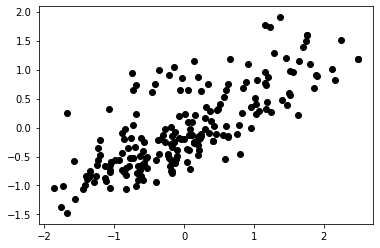

In [27]:
import matplotlib.pyplot as plt
# Plot outputs
plt.scatter(y_test, y_pred,  color='black')

In [28]:
from sklearn.metrics import mean_squared_error, r2_score
print(mean_squared_error(y_test, y_pred)) #MSE

0.37569859631667707


In [29]:
print(r2_score(y_test, y_pred))

0.5875806414437219


In [19]:
#Feature Scaling using Standardization
from sklearn.preprocessing import StandardScaler

s = StandardScaler().fit_transform(cement)

cement_s = pd.DataFrame(s)
print(cement_s.head())

          0         1         2         3         4         5         6  \
0 -1.339017  1.601441 -0.847144  1.027590 -1.039143 -0.014398 -0.312970   
1 -1.074790 -0.367541  1.096078 -1.090116  0.769617  1.388141  0.282260   
2 -0.298384 -0.856888  0.648965  0.273274 -0.118015 -0.206121  1.093371   
3 -0.145209  0.465044 -0.847144  2.175461 -1.039143 -0.526517 -1.292542   
4 -1.209776  1.269798 -0.847144  0.549700  0.484905  0.958372 -0.959363   

          7         8  
0 -0.279733 -0.355018  
1 -0.501465 -0.737108  
2 -0.279733 -0.395144  
3 -0.279733  0.600806  
4 -0.279733 -1.049727  
